# **World Happiness Index Data Set**

# **Questions**

**Question 1:** **(Supervised Model)** Which available metric has the biggest impact on the happiness of a country and why does it have that much of an impact?

**Question 2:** **(Clustering)** When using economy, health, and family, what kind of clusters are seen and what is the difference between them?

**Question 3:** **(Dimensionality Reduction)** Are there any metrics of the ones included in this dataset that don't have a reliable impact on happiness when regularized using LASSO?

# Variables

Country: Country name

Region: The continental region of the country

Happiness Rank: Number ranking all the country's in order of calculated happiness

Happiness Score: Number scoring the happiness of the country

Economy (GDP per Capita): Meaures strength of the economy

Family: Metric to indicate how much the people of the country value family

Health (Life Expectancy): Scoring of the life expectancy of the population

Freedom: Scoring of how free the people of the country perceive themselves

Trust (Government Corruption): Scoring of how much trust the population has in the government

Generosity: Scoring of how generous the population is seen

In [ ]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split # simple TT split cv
import numpy as np

from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV

In [ ]:
#Get data
data = pd.read_csv("https://raw.githubusercontent.com/dmcintosh11/CPSC/main/CPSC_392/FinalProject/output%202.csv?token=GHSAT0AAAAAABRIRLWQKX22JH75LUCDHI24YUAIUUQ")
data.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,0.0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Get column names for easy access
data.columns


Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'year', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52'],
      dtype='object')

In [ ]:
#Data cleaning
data = data[['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]
print(data.shape)
data = data.dropna()
print(data.shape)
data = data.rename({"Economy (GDP per Capita)":"Economy", "Health (Life Expectancy)":"Health", "Trust (Government Corruption)":"Trust"}, axis = 1)
data.head()

(1231, 10)
(158, 10)


,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


# **Question 1:** **(Supervised Model)** Which available metric has the biggest impact on the happiness of a country and why does it have that much of an impact?

**Variables Involved:** Happiness Score, Economy, Family, Health, Freedom, Trust, Generosity

In [ ]:
#Grab predictors
predictors = ['Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity']

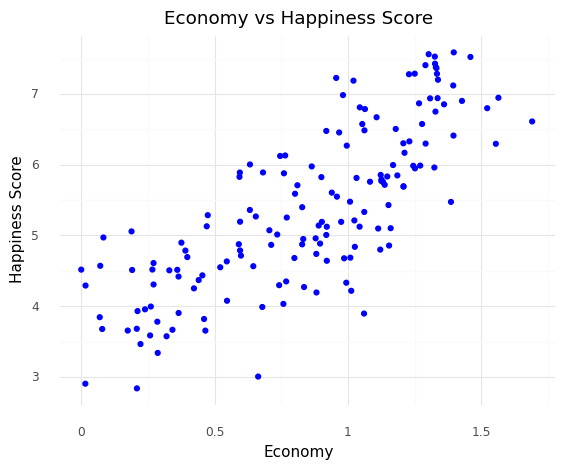

<ggplot: (8743132086221)>

In [ ]:
(ggplot(data, aes(x="Economy", y="Happiness Score")) + geom_point(color = "blue") + ggtitle("Economy vs Happiness Score") + theme_minimal())

# **Strong positive linear relationship**

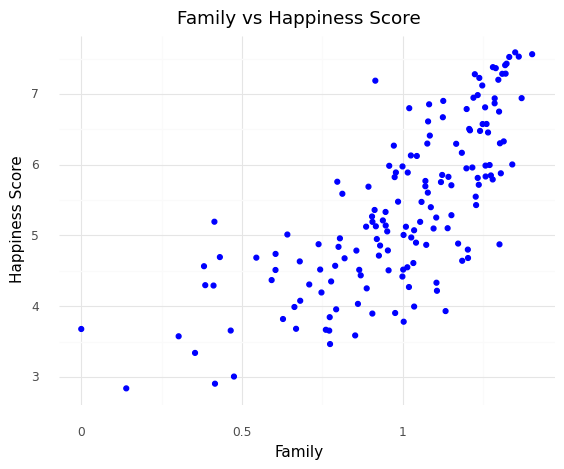

<ggplot: (8743126480789)>

In [ ]:
(ggplot(data, aes(x="Family", y="Happiness Score")) + geom_point(color = "blue") + ggtitle("Family vs Happiness Score") + theme_minimal())

# **Strong positive linear/quadratic relationship**



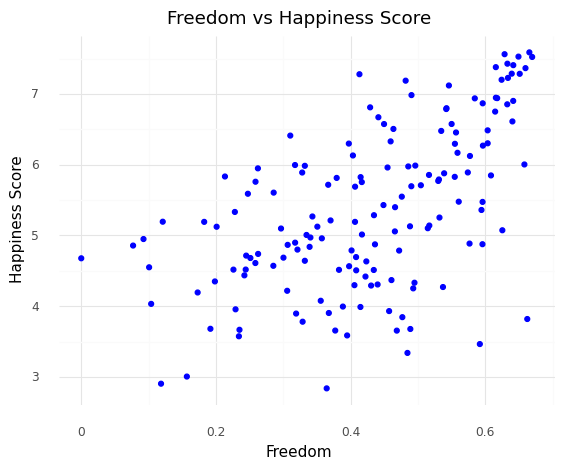

<ggplot: (8743126455269)>

In [ ]:
(ggplot(data, aes(x="Freedom", y="Happiness Score")) + geom_point(color = "blue") + ggtitle("Freedom vs Happiness Score") + theme_minimal())

# **Medium positive linear relationship**

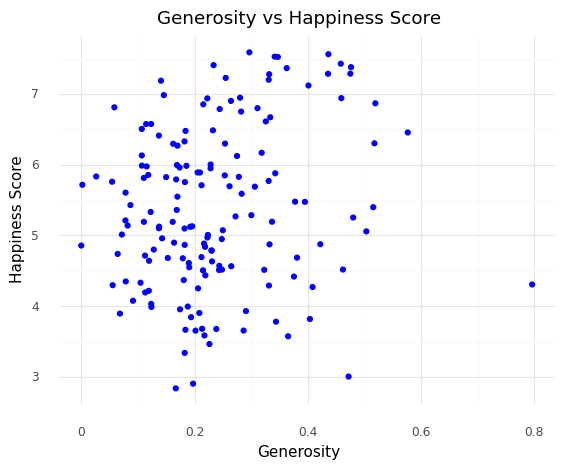

<ggplot: (8743126501069)>

In [ ]:
(ggplot(data, aes(x="Generosity", y="Happiness Score")) + geom_point(color = "blue") + ggtitle("Generosity vs Happiness Score") + theme_minimal())

# **Very difficult to tell if there even is a relationship, potentially weak positive linear one**

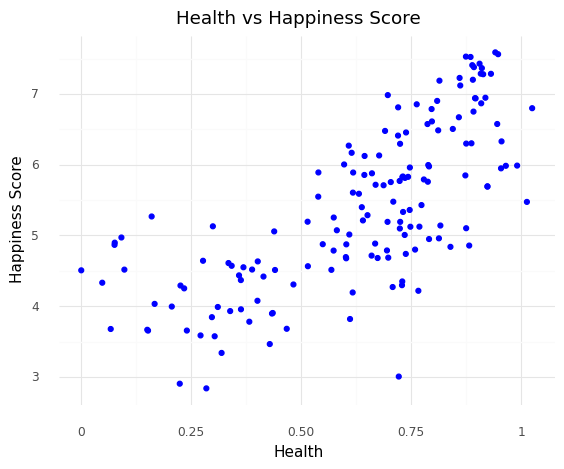

<ggplot: (8743126477925)>

In [ ]:
(ggplot(data, aes(x="Health", y="Happiness Score")) + geom_point(color = "blue") + ggtitle("Health vs Happiness Score") + theme_minimal())

# **Strong positive linear relationship**

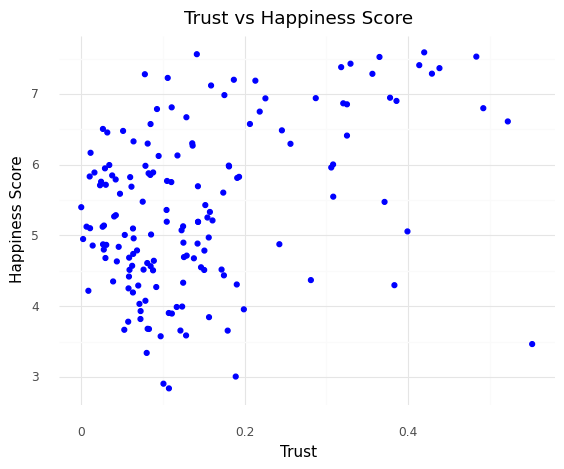

<ggplot: (8743126630677)>

In [ ]:
(ggplot(data, aes(x="Trust", y="Happiness Score")) + geom_point(color = "blue") + ggtitle("Trust vs Happiness Score") + theme_minimal())

# **Again rather difficult to tell if there is a relationship, potentially weak positive linear one**

From these scatterplots I would hypothesize that either Health, Freedom, or Family would have the highest impact on Happiness Score and be the best indicator of a happy country. This is because they all ahve a strong positive relationship with Happiness Score and the data points seem to be heavily concentrated in the top right of the graph which is where both Happiness Score as well as the specific variable have high values.

In [ ]:
#TTS
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data["Happiness Score"], test_size=0.2, random_state=43)

#Z-scoring continuous variables
z = StandardScaler()
X_train[predictors] = z.fit_transform(X_train[predictors])
X_test[predictors] = z.transform(X_test[predictors])

#Creating and fitting model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Training set significance
print("Training set r squared: " + str(r2_score(y_train, lr.predict(X_train))))
print("Training set MSE: " + str(mean_squared_error(y_train, lr.predict(X_train))))

Training set r squared: 0.7832007754766344
Training set MSE: 0.2737316171862982


In [ ]:
#Testing set significance
print("Testing set r squared: " + str(r2_score(y_test, lr.predict(X_test))))
print("Testing set MSE: " + str(mean_squared_error(y_test, lr.predict(X_test))))

Testing set r squared: 0.7325132430220829
Testing set MSE: 0.37500021585352783


R squared value of this model for both training and testing set are both pretty high, which means that this model is significant and is reliable for predictions. The closer these values are to 1, the better. It also isn't too overfit since the training r2 value isn't significantly larger than that of the testing set, however there is some overfitting since it is better at training data. This means that it isn't overly specialized onto the training set and can be used to predict unseen data reliably.

MSE values were also relatively low compared to the scale of the Happiness Score values in the data set. This again enforces the idea that this model is effective and reliable

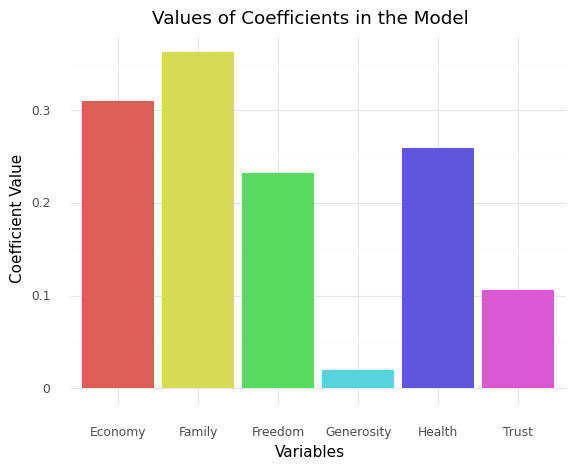

<ggplot: (8743131666181)>

In [ ]:
coef = pd.DataFrame({"Coef": lr.coef_, "Names": predictors})


(ggplot(coef, aes(x="Names", y="Coef", fill = "Names")) + geom_bar(stat = "identity") + theme_minimal() + theme(legend_position = "none") + ggtitle("Values of Coefficients in the Model") + xlab("Variables") + ylab("Coefficient Value"))

This bar graph essentially shows a comparison between all of the coefficients for all of the predictor variables involved in the model. From this we can see that Family has by far the largest coefficient with Economy and Health being the other top 3 biggest factors in Happiness Score. For every standard deviation from the average Family score, Happiness Score increases by about 0.35. This means that out of all the involved variables in the data set, Family has the greatest impact on the Happiness Score of a country. This would make sense since no matter who you are or what country you are in, you usually spend a majority of your time in your life with your family so that would have a large impact on your happiness.



---



# **Question 2:** **(Clustering)** When using economy, health, and family, what kind of clusters are seen and what is the difference between them?

**Variables Involved:** Economy, Family, Health

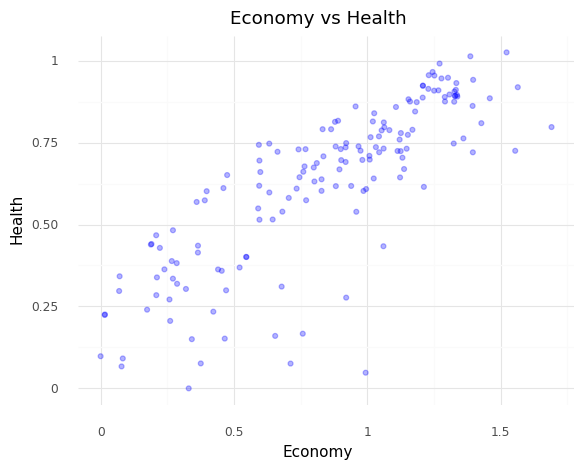

<ggplot: (8743126705001)>

In [ ]:
(ggplot(data, aes(x = "Economy", y = "Health")) + geom_point(color = "blue", alpha = 0.3) + theme_minimal() + xlab("Economy") + ylab("Health") + ggtitle("Economy vs Health"))

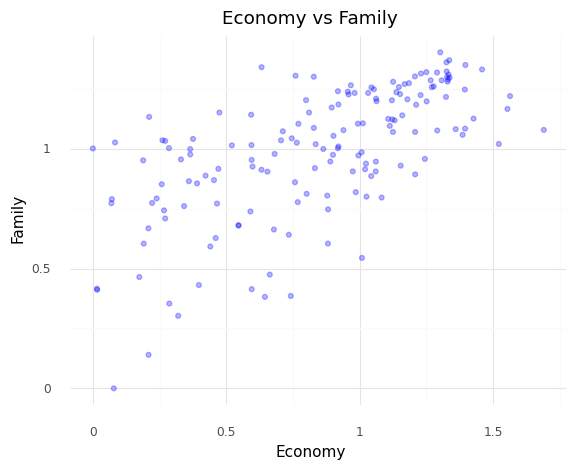

<ggplot: (8743125828969)>

In [ ]:
(ggplot(data, aes(x = "Economy", y = "Family")) + geom_point(color = "blue", alpha = 0.3) + theme_minimal() + xlab("Economy") + ylab("Family") + ggtitle("Economy vs Family"))

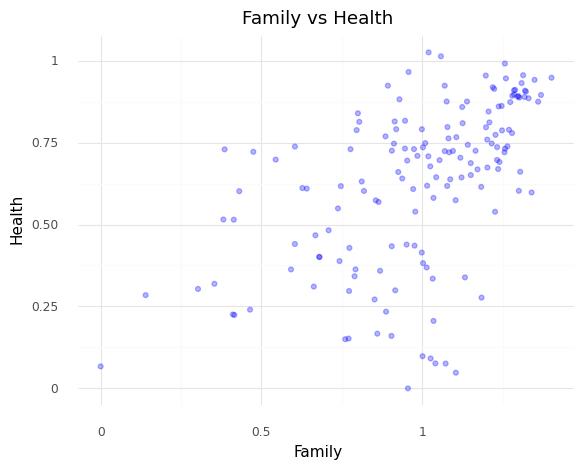

<ggplot: (8743125797177)>

In [ ]:
(ggplot(data, aes(x = "Family", y = "Health")) + geom_point(color = "blue", alpha = 0.3) + theme_minimal() + xlab("Family") + ylab("Health") + ggtitle("Family vs Health"))

It is rather difficult to discern clusters in the model just from these graphs with the human eye. This is because there are no distinct concentrations of data points and the data isn't separated all that much. However, I could slightly see a separation of two clusters from the Economy vs Health graph as well as the Family vs Health graph with a split from the top right and the bottom left of the graph.

**EM** is a fantastic algorithm for clustering this data. The more oblong structure of the clusters apparent in the graphs above is no problem for EM and it won't have difficulty clustering them as opposed to KMeans that has the assumption of spherical data so it would have trouble with this dataset. The soft assignment that this algorithm provides is pretty beneficial because two of the clusters seem relatively close together with a lot of overlapping between them. The soft assignment is essentially the algorithm calculating the probability that a data point will be in a certain cluster. This will be beneficial for clustering those "in between" data points. Another clustering method, DBSCAN, will not be effective on this data set since the clusters seem to be overlapping. So we will utilize the EM clustering method.

In [ ]:
features = ["Economy", "Health", "Family"]

X = data[features]

z = StandardScaler()

X[features] = z.fit_transform(X)

EM = GaussianMixture(n_components = 2)
 
EM.fit(X)

cluster = EM.predict(X)

print("SILHOUETTE: ", silhouette_score(X, cluster))

X["clusterEM"] = cluster

SILHOUETTE:  0.5051134847934404


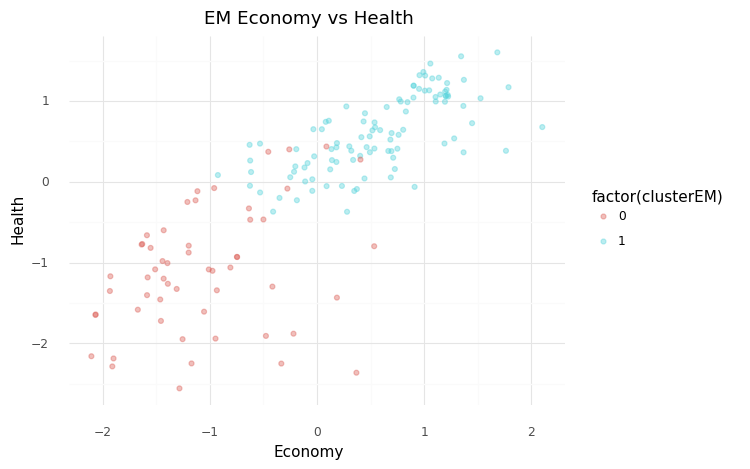

<ggplot: (8743126472873)>

In [ ]:
(ggplot(X, aes(x = "Economy", y = "Health", color = "factor(clusterEM)")) + geom_point(alpha = 0.4) + theme_minimal() + xlab("Economy") + ylab("Health") + ggtitle("EM Economy vs Health"))

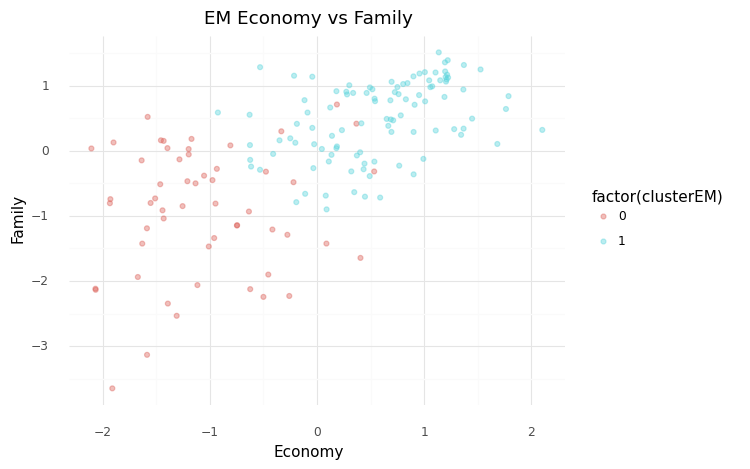

<ggplot: (8743126636361)>

In [ ]:
(ggplot(X, aes(x = "Economy", y = "Family", color = "factor(clusterEM)")) + geom_point(alpha = 0.4) + theme_minimal() + xlab("Economy") + ylab("Family") + ggtitle("EM Economy vs Family"))

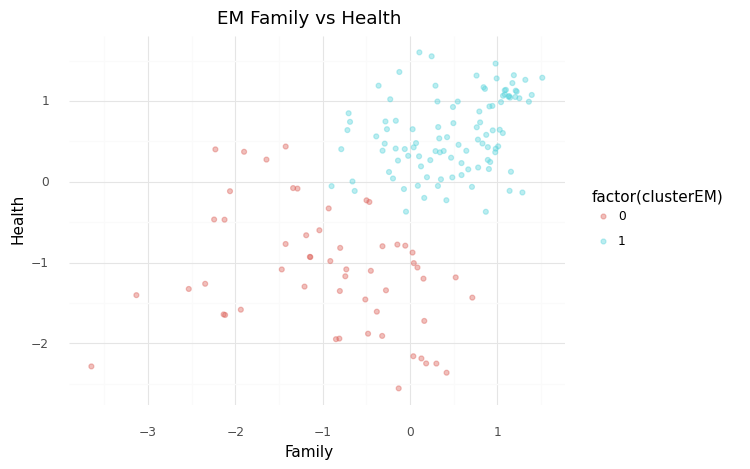

<ggplot: (8743125139733)>

In [ ]:
(ggplot(X, aes(x = "Family", y = "Health", color = "factor(clusterEM)")) + geom_point(alpha = 0.4) + theme_minimal() + xlab("Family") + ylab("Health") + ggtitle("EM Family vs Health"))

The cluster silhoutte score of about 0.5 indicatesa decently accurate clustering method. This score ranges from 0 to 1 so midway through is a score that we can work with. This score measures both the separation and the cohesiveness of the clusters. Separation is the distance between each cluster and how different the data points in each cluster are from another cluster. Cohesion is how similar the data points in each cluster are to other data points in their respective clusters. The two clusters that emerge appear to show countries either have high scores in all of these metrics or low scores in all of them. For the most part, excluding the outliers, Cluster #1 (blue) encapsulates countries with high scores in all 3 metrics and Cluster #0 (red) contains the countries with low scores in all 3 metrics. We can see from this that generally if a country has a high score in one metric, it will probably have high scores in the other two metrics involved. The opposite is also apparent where if a country has a low score in one metric, the other two are probably also low.



---



# **Question 3:** **(Dimensionality Reduction)** Are there any metrics of the ones included in this dataset that don't have a reliable impact on happiness when regularized using LASSO?

**Variables Involved:** Country, Happiness Score, Economy, Family, Health, Freedom, Trust, Generosity

In [ ]:
datanew = data[['Happiness Score', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity']]


num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_numeric = datanew.select_dtypes(include = num)

features = [x for x in df_numeric.columns if x != "Happiness Score"]


X = df_numeric[features]
y = df_numeric["Happiness Score"]



# pipeline
z = make_column_transformer((StandardScaler(), features))
lasso = Lasso()

pipe = make_pipeline(z, lasso)
print(pipe.get_params().keys())


# gridsearch
a = {"lasso__alpha": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 2, 3, 5]}

grid = GridSearchCV(pipe, a, scoring = "neg_mean_squared_error", refit = True, cv = 5)
grid.fit(X_train, y_train)


# evaluate model
print("PENALTY:", grid.best_estimator_.get_params()["lasso__alpha"])
print("TRAIN:", r2_score(y_train, grid.predict(X_train)))
print("TEST :", r2_score(y_test, grid.predict(X_test)))

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'lasso', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__standardscaler', 'columntransformer__standardscaler__copy', 'columntransformer__standardscaler__with_mean', 'columntransformer__standardscaler__with_std', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])
PENALTY: 0.05
TRAIN: 0.779206753124307
TEST : 0.7182239510229128


Creating a pipeline and using gridsearch with this regularization helps to tune hyperparameters to the correct value. The gridsearch revealed that the best alpha value, or penalty, to be used in this situation is 0.05. This alpha value essentially gives a weight to the regularization and dictates how much of an impact the regularization has on adjusting the coefficient values of the variables within the model. This model with a 0.05 penalty has very good r2 values for both the training set and testing set, similar to what appeared in the original linear regression model. They are both pretty close to 1. This model is also slightly overfit as well since the training r2 value is larger than the testing value, however it is not enough to cause concern and the model is valud to use on unseen data.

[0.30016915 0.33889793 0.24189028 0.22425975 0.07869486 0.        ]


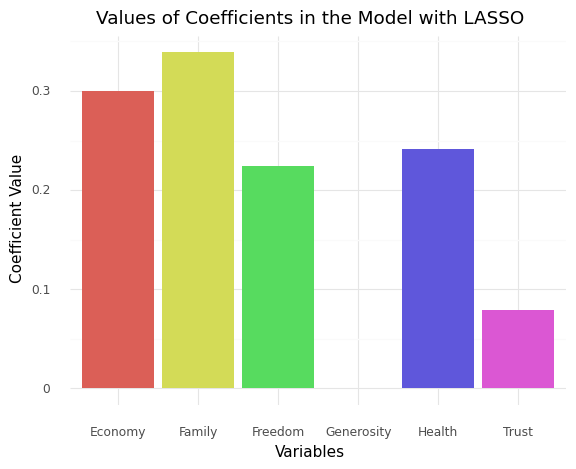

<ggplot: (8743123127413)>

In [ ]:
print(grid.best_estimator_.steps[1][1].coef_)

coefnew = pd.DataFrame({"Coef": grid.best_estimator_.steps[1][1].coef_, "Names": predictors})


(ggplot(coefnew, aes(x="Names", y="Coef", fill = "Names")) + geom_bar(stat = "identity") + theme_minimal() + theme(legend_position = "none") + ggtitle("Values of Coefficients in the Model with LASSO") + xlab("Variables") + ylab("Coefficient Value"))

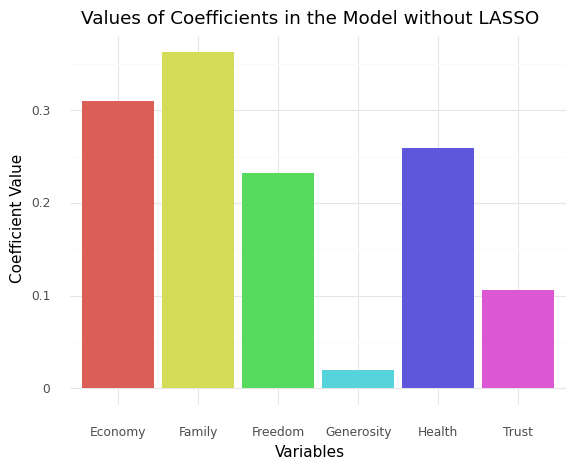

<ggplot: (8743123285957)>

In [ ]:
(ggplot(coef, aes(x="Names", y="Coef", fill = "Names")) + geom_bar(stat = "identity") + theme_minimal() + theme(legend_position = "none") + ggtitle("Values of Coefficients in the Model without LASSO") + xlab("Variables") + ylab("Coefficient Value"))

LASSO will regularize all the variables involved and eventually bring the most insignificant coefficients down to zero. The graph shows that all of the coefficient values from the model were lowered and brought closer to 0, reducing the complexity and simplifying the model. This simplification helps to prevent overfitting since a model's complexity has an impact on how overfit it can become. All of the variables that get regularized to 0 don't have a reliable impact on the happiness score and could be removed from the model if needed. From this graph we can see that Generosity was essentially removed from the model since it was regularized to 0. That means that the generosity metric within a country does not have a reliable impact on the country's happiness score. For the most part the rest of the variables involved weren't brought low enough to be considered insignificant in the model and are all valuable in predicting happiness score.